# ARC thermo demo

Here we calculate thermodynamic data for several species.

This demo shows different methods to define an ARCSpecies object: (1) from an RMG `Species` object, (2) using xyz (we also give SMILES for the 2D graph bond orders used for BAC), (3) from SMILES, (4) from an RMG `Molecule` object, (5) from an RMG adjacency list.

### imports

In [1]:
import rmgpy
from rmgpy.molecule.molecule import *
from rmgpy.species import Species
from arc.species import ARCSpecies
from IPython.display import display
import arc
import matplotlib.pyplot as plt
%matplotlib notebook

Using Theano backend.


### Below are different methods to define species in ARC

In [2]:
"""
Arguments for ARCSpecies:
------------------------
label (``str``)
is_ts (True/False, default is False)
rmg_species (an RMG `Species` object)
mol (an RMG `Molecule` object)
xyz (an xyz guess)
multiplicity (``int``, trivial value, 1 or 2, automatically determined)
charge (``int``, default: 0)
smiles (SMILES structure)
adjlist (RMG Adjacency List structure)
bond_corrections (BAC dictionary for Arkane)
generate_thermo (True/False, default is True)
yml_path (path to the YAML file)
ts_methods (a list with TS guess methods, default is in settings.py)

Note: A TS ARCSpecies object does not have to be created (unless the user would like to explicitly set arguments),
      it will be automatically created per ARCReaction object if not already defined.
"""

# Method 1: RMG `Species` object (here by SMILES)
spc1 = Species(molecule=[Molecule().fromSMILES("C=C[O]")])  # delocalized radical + amine
spc1.label = 'vinoxy'
print '1.', spc1.label + ':'
display(spc1)

# Method 2: ARCSpecies object by XYZ (also give SMILES for thermo BAC)
oh_xyz = """O       0.00000000    0.00000000   -0.12002167
H       0.00000000    0.00000000    0.85098324"""
spc2 = ARCSpecies(label='OH', xyz=oh_xyz, smiles='[OH]', multiplicity=2, charge=0)
print '\n\n', '2.', spc2.label + ':'
display(spc2.mol)

# Method 3: ARCSpecies object by SMILES
spc3 = ARCSpecies(label='methylamine', smiles='CN', multiplicity=1, charge=0)
print '\n\n', '3.', spc3.label + ':'
display(spc3.mol)

# Method 4: ARCSpecies object by RMG Molecule object
mol4 = Molecule().fromSMILES("C=CC")
spc4 = ARCSpecies(label='propene', mol=mol4, multiplicity=1, charge=0)
print '\n\n', '4.', spc4.label + ':'
display(spc4.mol)

# Method 5: ARCSpecies by AdjacencyList (to generate AdjLists, see https://rmg.mit.edu/molecule_search)
so2_adj = """1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,S} {6,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}
6 H u0 p0 c0 {2,S}"""
spc5 = ARCSpecies(label='N2H4', adjlist=so2_adj, multiplicity=1, charge=0)
print '\n\n', '5.', spc5.label + ':'
display(spc5.mol)

# Last, collect all RMG Species objects and ARCSpecies objects in a list:
arc_species_list = [spc1, spc2, spc3, spc4, spc5]

1. vinoxy:




2. OH:




3. methylamine:




4. propene:




5. N2H4:


### Run ARC:

ARC execution initiated on Fri Jun 28 14:49:30 2019

###############################################################
#                                                             #
#                 Automatic Rate Calculator                   #
#                            ARC                              #
#                                                             #
#   Version: 1.0.0                                            #
#                                                             #
###############################################################

The current git HEAD for ARC is:
    ce32cacbc131b2e157e6f604a37358bc24c2d01b
    Mon Jun 24 14:01:38 2019 -0400
    (running on the solvationTest branch)

Starting project ArcDemo
Using default level b97d3/6-31+g(d,p) for refined conformer searches (after filtering via force fields)
Using default level b97d3/6-31+g(d,p) for TS guesses comparison of different methods
Using default level wb97xd/6-311++g(d,p) for geometry optimizati

Considering species: methylamine


Considering species: propene


Considering species: N2H4


Considering species: vinoxy





Found one possible rotor for methylamine
Pivot list(s) for methylamine: [[1, 2]]


Found one possible rotor for propene
Pivot list(s) for propene: [[1, 2]]


Found one possible rotor for N2H4
Pivot list(s) for N2H4: [[1, 2]]


Found one possible rotor for vinoxy
Pivot list(s) for vinoxy: [[2, 3]]

Running job conformer_a34 for OH
Running job conformer_a35 for OH
Running job conformer_a36 for OH
Running job conformer_a37 for methylamine
Running job conformer_a38 for methylamine
Running job conformer_a39 for propene
Running job conformer_a40 for propene
Running job conformer_a41 for N2H4
Running job conformer_a42 for N2H4
Running job conformer_a43 for vinoxy
Running job conformer_a44 for vinoxy
Running job conformer_a45 for vinoxy
Running job conformer_a46 for vinoxy
  Ending job conformer_a34 for OH (run time: 0:00:18)
  Ending job conformer_a37 for methylamine (run time: 0:00:19)
  Ending job conformer_a39 for propene (run time: 0:00:19)
  Ending job conformer_a41 for N2H4 (run time

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a56 for methylamine
Running job sp_a57 for methylamine
Running job scan_a58 for methylamine (pivots: [1, 2])
  Ending job opt_a52 for propene (run time: 0:00:29)

Optimized geometry for propene at wb97xd/6-311++g(d,p):
C      -1.10073300    0.12101500   -0.26003700
C       0.15992300   -0.25064100    0.45846000
C       1.38891600    0.01239500    0.03011900
H      -0.88833400    0.64372800   -1.19552400
H      -1.72677100    0.76886100    0.36181200
H      -1.69456500   -0.76929400   -0.49033500
H       0.03528700   -0.77676500    1.40342100
H       2.26334300   -0.28424300    0.59860900
H       1.56293300    0.53494500   -0.90652400



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a59 for propene
Running job sp_a60 for propene
Running job scan_a61 for propene (pivots: [1, 2])
  Ending job opt_a53 for N2H4 (run time: 0:00:16)

Optimized geometry for N2H4 at wb97xd/6-311++g(d,p):
N      -0.64242400    0.00062500   -0.35311500
N       0.64242400   -0.00062400    0.35311500
H      -1.14626700   -0.79842600    0.02231700
H      -1.14751000    0.79648200    0.02739700
H       1.14626800    0.79842500   -0.02231800
H       1.14750900   -0.79648200   -0.02739400



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a62 for N2H4
Running job sp_a63 for N2H4
Running job scan_a64 for N2H4 (pivots: [1, 2])
  Ending job opt_a54 for vinoxy (run time: 0:01:01)
Running job opt_a65 for vinoxy (fine opt)
  Ending job opt_a55 for OH (run time: 0:00:09)

Optimized geometry for OH at wb97xd/6-311++g(d,p):
O       0.00000000    0.00000000   -0.11992500
H       0.00000000    0.00000000    0.85088600



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a66 for OH
Running job sp_a67 for OH
  Ending job freq_a56 for methylamine (run time: 0:00:35)
  Ending job freq_a59 for propene (run time: 0:01:00)
  Ending job freq_a62 for N2H4 (run time: 0:00:27)
Error: species N2H4 has 1 imaginary frequencies, should have exactly 0.
Species N2H4 has a negative frequency (-126.1388). Perturbing its geometry using the respective vibrational displacements
Deleting all currently running jobs for species N2H4 before troubleshooting for negative frequency...
Running job conformer_a68 for N2H4
Running job conformer_a69 for N2H4
  Ending job freq_a66 for OH (run time: 0:00:09)
  Ending job sp_a57 for methylamine (run time: 0:00:12)
  Ending job sp_a60 for propene (run time: 0:00:16)
  Ending job opt_a65 for vinoxy (run time: 0:00:44)

Optimized geometry for vinoxy at wb97xd/6-311++g(d,p):
O       1.01486700    0.37874600    0.00183300
C       2.83420100   -0.17087700   -1.34901800
C       2.18746400    0.02891800   -0.09577800
H       3.8

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a70 for vinoxy
Running job sp_a71 for vinoxy
Running job scan_a72 for vinoxy (pivots: [2, 3])
  Ending job sp_a67 for OH (run time: 0:00:05)

All jobs for species OH successfully converged. Run time: 0:01:02
  Ending job conformer_a68 for N2H4 (run time: 0:00:40)
  Ending job conformer_a69 for N2H4 (run time: 0:00:39)

Conformer jobs for N2H4 successfully terminated.

Most stable conformer for species N2H4 was found to be isomorphic with the 2D graph representation NN

Running job opt_a73 for N2H4
  Ending job sp_a71 for vinoxy (run time: 0:00:23)
  Ending job freq_a70 for vinoxy (run time: 0:00:50)
  Ending job opt_a73 for N2H4 (run time: 0:00:52)
Running job opt_a74 for N2H4 (fine opt)
  Ending job opt_a74 for N2H4 (run time: 0:00:21)

Optimized geometry for N2H4 at wb97xd/6-311++g(d,p):
N       0.70959900    0.03866600   -0.04040800
N      -0.70960000    0.03866500    0.04040800
H       1.08033100    0.29835800    0.86356600
H       1.08956000   -0.86502100   -0.301

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a75 for N2H4
Running job sp_a76 for N2H4
Running job scan_a77 for N2H4 (pivots: [1, 2])
  Ending job sp_a76 for N2H4 (run time: 0:00:10)
  Ending job freq_a75 for N2H4 (run time: 0:00:26)
  Ending job scan_a58 for methylamine (run time: 0:12:09)
Determined a symmetry number of 3 for rotor of species methylamine between pivots [1, 2] based on the number of peaks and valleys, all within the determined resolution criteria.
Rotor scan [6, 1, 2, 3] between pivots [1, 2] for methylamine has symmetry 3


<IPython.core.display.Javascript object>


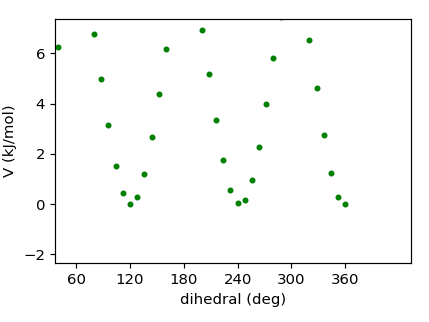


All jobs for species methylamine successfully converged. Run time: 0:13:31
  Ending job scan_a77 for N2H4 (run time: 0:10:01)
Determined a symmetry number of 1 for rotor of species N2H4 between pivots [1, 2] based on the worst peak resolution criterion.
Rotor scan [3, 1, 2, 5] between pivots [1, 2] for N2H4 has symmetry 1


<IPython.core.display.Javascript object>


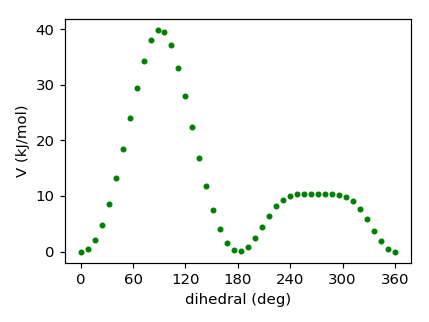


All jobs for species N2H4 successfully converged. Run time: 0:12:38
  Ending job scan_a72 for vinoxy (run time: 0:18:31)

All jobs for species vinoxy successfully converged. Run time: 0:22:25
  Ending job scan_a61 for propene (run time: 0:29:15)

All jobs for species propene successfully converged. Run time: 0:30:48


Loading the RMG database...



Determined a symmetry number of 3 for rotor of species methylamine between pivots [1, 2] based on the number of peaks and valleys, all within the determined resolution criteria.
Using the following BAC for methylamine: {'C-N': 1, 'H-N': 2, 'C-H': 3}



Thermodynamics for methylamine:
  Enthalpy of formation (298 K)   =    -4.779 kcal/mol
  Entropy of formation (298 K)    =    57.807 cal/(mol*K)
   =========== =========== =========== =========== ===========
   Temperature Heat cap.   Enthalpy    Entropy     Free energy
   (K)         (cal/mol*K) (kcal/mol)  (cal/mol*K) (kcal/mol)
   =========== =========== =========== =========== ===========

Determined a symmetry number of 1 for rotor of species N2H4 between pivots [1, 2] based on the worst peak resolution criterion.
Using the following BAC for N2H4: {'N-N': 1, 'H-N': 4}





Thermodynamics for N2H4:
  Enthalpy of formation (298 K)   =    22.461 kcal/mol
  Entropy of formation (298 K)    =    58.266 cal/(mol*K)
   =========== =========== =========== =========== ===========
   Temperature Heat cap.   Enthalpy    Entropy     Free energy
   (K)         (cal/mol*K) (kcal/mol)  (cal/mol*K) (kcal/mol)
   =========== =========== =========== =========== ===========
           300      11.716      22.484      58.345       4.981
           400      13.635      23.753      61.982      -1.039
           500      15.360      25.205      65.214      -7.402
           600      16.901      26.819      68.153     -14.073
           800      19.500      30.469      73.385     -28.239
          1000      21.556      34.583      77.967     -43.384
          1500      24.993      46.304      87.424     -84.833
          2000      26.973      59.336      94.909    -130.482
          2400      28.026      70.347      99.925    -169.473
   =========== =========== =========== ==

<IPython.core.display.Javascript object>


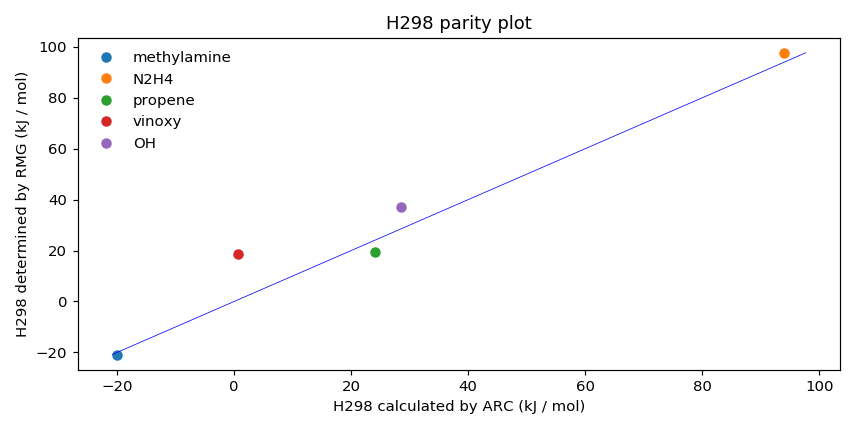

<IPython.core.display.Javascript object>


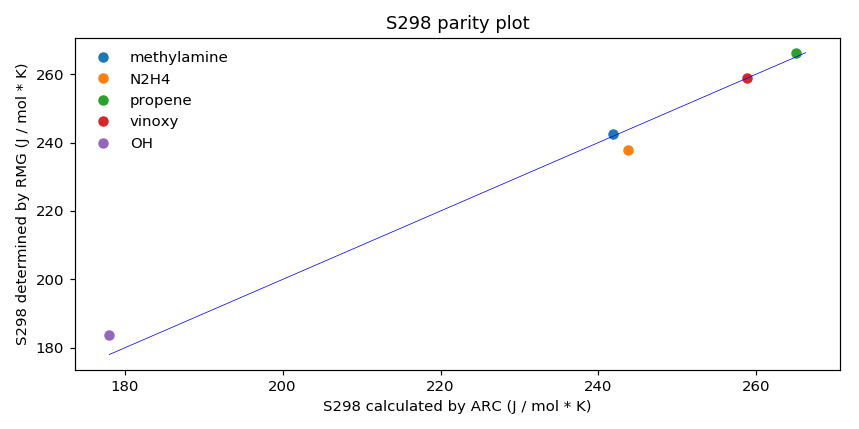


Sources of thermoproperties determined by RMG for the parity plots:
   methylamine: Thermo library: thermo_DFT_CCSDTF12_BAC
   N2H4:        Thermo library: thermo_DFT_CCSDTF12_BAC
   propene:     Thermo library: DFT_QCI_thermo
   vinoxy:      Thermo library: DFT_QCI_thermo
   OH:          Thermo library: BurkeH2O2




All jobs terminated. Summary for project ArcDemo:

Species methylamine converged successfully
Species N2H4 converged successfully
Species propene converged successfully
Species vinoxy converged successfully
Species OH converged successfully

Total execution time: 00:33:46
ARC execution terminated on Fri Jun 28 15:23:50 2019


In [3]:
"""
Arguments for ARC:
-----------------
project (``str``, the project name. Should be a valid name for a folder)
arc_species_list (A list of ARCSpecies and RMF `Species` objects)
arc_rxn_list (A list of ARCReacrion and RMF `Reaction` objects)
level_of_theory (e.g., `CCSD(T)-F12a/aug-cc-pVTZ//B3LYP/6-311++G(3df,3pd)` or `CBS-QB3`...)
conformer_level
composite_method (either pass the composite method here, or in `level_of_theory`)
opt_level
freq_level (set to `opt_level` if not specified)
sp_level
scan_level
ts_guess_level
fine (True/False, default is True)
generate_conformers (True/False, default is True)
scan_rotors (True/False, default is True)
use_bac (True/False for using bond additivity corrections, default is True)
model_chemistry (should be a valid Arkane "model chemistry")
ess_settings (a software:server dictionary, overrides ARC's servers scanner)
initial_trsh (an initial troubleshooting method for jobs)
t_min (float, minimal T for kineics computations, default: 300)
t_max (float, maximal T for kineics computations, default: 3000)
t_count (int The number of temperature points between t_min and t_max for kinetics computations)
verbose (logging verbosity)
project_directory (A path to the project directory, defaults to ARC/Projects/<project name>)
"""

ess_settings = {'gaussian': 'pharos'}
arc0 = arc.ARC(project='ArcDemo', arc_species_list=arc_species_list, ess_settings=ess_settings)
arc0.execute()